# Inference with uncertainty bounds
In this jupyter notebook we will show simple example of inference with uncertainty bounds in [Logical Neural Networks](https://github.com/IBM/LNN) (LNN).


## Model definition

For this purpose we will keep the predicates and axioms from previous notebook about downward inference.

In [6]:
from lnn import Model, Predicate, Variable, Implies, ForAll, World, Exists

# create empty model
model = Model()

# define predicates
grecian = Predicate(name="grecian")
human = Predicate(name="human")
mortal = Predicate(name="mortal")

# add predicates to the model
model.add_formulae(grecian, human, mortal)

# define free variable
x = Variable("x")

# define our axiom
some_grecians_are_humans = Exists(
    x,
    Implies(grecian(x), human(x), name="grecians_are_humans"),
    name="some_grecians_are_humans",
    world=World.AXIOM,
)

all_humans_are_mortal = ForAll(
    x,
    Implies(human(x), mortal(x), name="human_is_mortal"),
    name="all_humans_are_mortal",
    world=World.AXIOM,
)

# add axiom to the model
model.add_formulae(some_grecians_are_humans, all_humans_are_mortal)


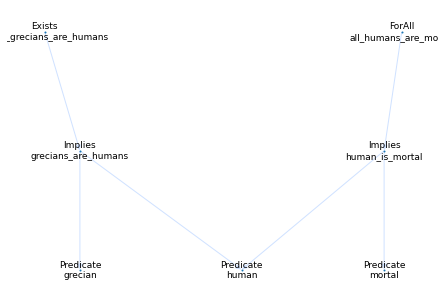

In [7]:
from lnn.utils import plot_graph

plot_graph(model)

Let us make one small change in the facts.

Lets say, we are not sure if `Zeus` is grecian because we do not know if this is faithful datapoint. Thus we set $grecian(Zeus)$ to `UNKNOWN`.

In [8]:
from lnn import Fact


model.add_facts(
    {
        "grecian": {
            "Parthenon": Fact.TRUE,
            "Socrates": Fact.TRUE,
            "Confucius": Fact.FALSE,
            "Great Pyramid of Giza": Fact.FALSE,
            "Zeus": Fact.UNKNOWN,
        },
        "human": {
            "Parthenon": Fact.FALSE,
            "Socrates": Fact.TRUE,
            "Confucius": Fact.TRUE,
            "Great Pyramid of Giza": Fact.FALSE,
            "Zeus": Fact.FALSE,
        },
    }
)


## Inference

Now, we will combine upward and downward inference into single command. We can start chain of upward/downward inferences by calling `Model.infer()`. This computation will run until it converges.

In [9]:
# perform inference
steps, facts_inferred = model.infer()

# result of the inference can be checked, happened in two steps and eleven facts were inferred
steps, facts_inferred

(2, tensor(11., grad_fn=<AddBackward0>))

Let us examine the result. We can see that $grecians\_are\_humans(x)$ and $human\_is\_mortal(x)$ yielded `UNKNOWN` for $mortal(Zeus)$.

We are not able to infer $grecians\_are\_humans(Zeus)$ since $grecian(Zeus)$ is `UNKNOWN`. Because of that we cannot infer $human\_is\_mortal(Zeus)$ and thus $mortal(Zeus)$ is `UNKNOWN`.

In [10]:
model.print()


***************************************************************************
                                LNN Model

AXIOM  ForAll: all_humans_are_mortal (x)                    TRUE (1.0, 1.0)

OPEN   Implies: human_is_mortal(x) 
'Great Pyramid of Giza'                                     TRUE (1.0, 1.0)
'Confucius'                                                 TRUE (1.0, 1.0)
'Parthenon'                                                 TRUE (1.0, 1.0)
'Socrates'                                                  TRUE (1.0, 1.0)
'Zeus'                                                      TRUE (1.0, 1.0)

AXIOM  Exists: some_grecians_are_humans (x)                 TRUE (1.0, 1.0)

OPEN   Implies: grecians_are_humans(x) 
'Great Pyramid of Giza'                                     TRUE (1.0, 1.0)
'Confucius'                                                 TRUE (1.0, 1.0)
'Parthenon'                                                FALSE (0.0, 0.0)
'Socrates'                               